<a href="https://colab.research.google.com/github/gustavor10silva/kmodes_e_kprototypes/blob/main/K_Modes_e_K_Prototypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Introdução

A maioria dos algoritmos de clusterização são baseados no cálculo de distância entre os pontos que compõem o conjunto de dados, como é o caso do K-Means, por exemplo.

Isso é bastante eficiente quando os dados são numéricos e contínuos. Porém, e quando os dados são categóricos?

Nesse caso, os algoritmos baseados no cálculo de distâncias não são recomendados. É perfeitamente possível transformar as colunas categóricas em numéricas e prosseguir com as técnicas baseadas em distâncias, mas isso não é o correto a se fazer, justamente porque existem modelos de clusterização específicos para lidar com variáveis categóricas.

Neste notebook serão abordados dois algoritmos: o **K-Modes** e o **K-Prototypes**. O primeiro é ideal para quando temos somente dados categóricos, já o segundo lida com datasets mistos, com dados numéricos e categóricos.

# 2 K-Modes

Como foi dito na introdução, o K-Modes é uma técnica de clusterização ideal para quando temos **somente dados categóricos**.

Vejamos a seguir seu funcionamento e uma aplicação.

## 2.1 Funcionamento

Este [vídeo](https://www.youtube.com/watch?v=b39_vipRkUo&ab_channel=AysanFernandes) é ótimo para ter um contato inicial com o K-Modes e entender seu funcionamento. Este [artigo](https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/) é uma referência boa para entender o funcionamento de forma mais detalhada com um exemplo (inclusive é dele que foram retiradas as imagens e o exemplo inicial deste notebook).

O K-Modes funciona de uma maneira bastante semelhante ao K-Means, mas com algumas diferenças para que o modelo entenda como agrupar variáveis categóricas. Para melhor entendimento, o papel do **líder** e do **modo** no K-Modes é muito similar ao papel do **centróide** no K-Means, sendo como uma "média" do cluster. O modo é como se fosse o centróide e o líder é a observação escolhida aleatoriamente para ser o modo inicial.

Segue o algoritmo:

```
1. Tome K observações aleatórias para serem os modos/líderes dos clusters;
2. Calcule as dissimilaridades entre as observações e os modos/líderes e atribua cada observação ao seu cluster mais próximo;
3. Defina novos modos para os clusters;
4. Repita os steps 2-3 até que não haja necessidade de reatribuições de modos.
```

E vejamos isso aplicado em um exemplo:

Suponha que temos o dataset com as informações de 8 pessoas:

* Cor do cabelo;
* Cor dos olhos;
* Cor autodeclarada da pele.

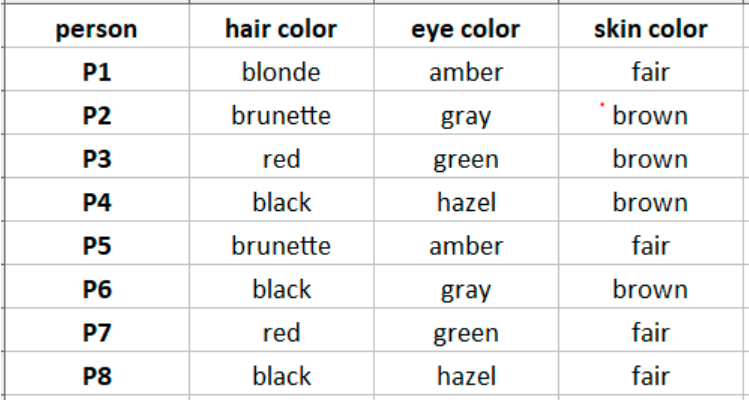

Vamos definir como número de clusters $K=3$.

## Step 1: Tome K observações aleatórias para serem os líderes dos clusters

Sejam P1, P7 e P8 os líderes:

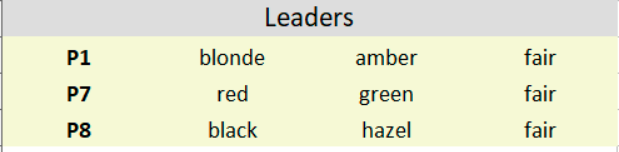

## Step 2: Calcule as dissimilaridades entre as observações e os líderes e atribua cada observação ao seu cluster mais próximo

Compare o líder com cada uma das observações. Essa comparação será feita entrada a entrada dos vetores.

* Para cada entrada igual, teremos 0;
* Para cada entrada diferente, teremos 1.

Em cada comparação, somaremos esses valores para ter um valor de dissimilaridade entre o cluster e cada observação, sendo que um total igual a 0 representa a máxima similaridade e um total maior representa uma similaridade menor.

Comparando o Cluster 1 (líder P1) com a observação P1:

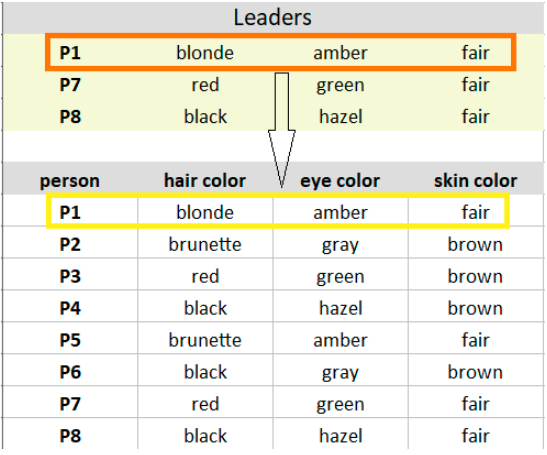

Como todas as três entradas são iguais, temos uma pontuação $0+0+0 = 0$ nesse caso.

Agora, vamos comparar o Cluster 1 (líder P1) com a observação P2:

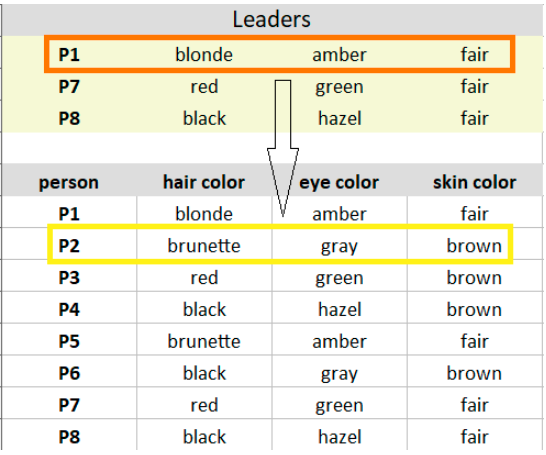

Nesse caso, como todas as entradas são diferentes, temos $1+1+1 = 3$.

Repetindo esse procedimento e comparando todos os líderes com todas as observações, temos a tabela:

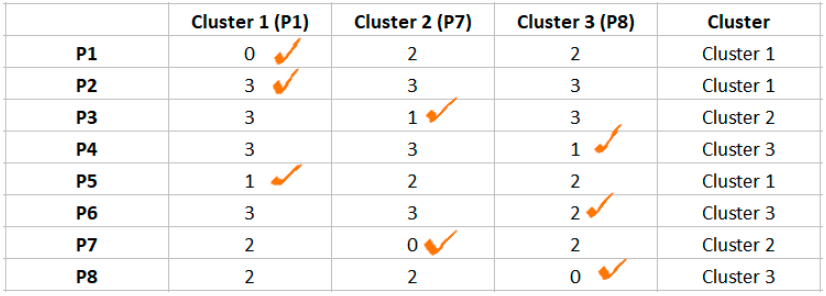

Note que na última coluna (Cluster), o que está sendo feito é o seguinte:

* Para a observação P1, a menor dissimilaridade foi na comparação com o líder do Cluster 1, então P1 será do Cluster 1;
* Para a observação P2, a menor dissimilaridade foi na comparação com o líder do Cluster 1, então P2 também será do Cluster 1.

E assim por diante, até atribuir cada observação a algum cluster.

## Step 3: Defina novos modos para os clusters

Modo é simplesmente um vetor onde cada entrada é o valor mais observado na coluna correspondente. Isso ficará evidente com a ilustração:

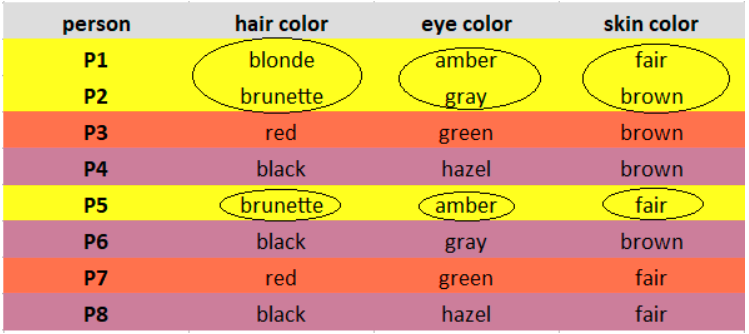

Em amarelo temos o Cluster 1; em vermelho temos o Cluster 2 e, em roxo, o Cluster 3. A atribuição dos modos funciona assim:

$$Cluster\ 1$$

> * Na coluna **hair color**, a classe que mais aparece é **brunette**;
> * Na coluna **eye color**, a classe que mais aparece é **amber**;
> * Na coluna **skin color**, a classe que mais aparece é **fair**.

Isso significa que o novo modo do Cluster 1 será:

$$Modo1 = [brunette, amber, fair]$$

Isso é feito com todos os clusters para atribuir os novos modos.

## Step 4: Repita os steps 2-3

Ou seja, com os novos modos, vamos calcular as dissimilaridades entre os modos e cada observação, reatribuir as observações aos clusters, reatribuir os modos novamente e repetir isso até que não haja mais necessidade de reatribuição de modos - isto é, até o momento em que a reatribuição não altere mais os modos.

O algoritmo também para quando atinge um número máximo de iterações `max_iter` predefinido .

## 2.2 Implementação

Boa parte da implementação foi construída baseada no artigo [The k-modes as Clustering Algorithm for Categorical Data Type](https://medium.com/geekculture/the-k-modes-as-clustering-algorithm-for-categorical-data-type-bcde8f95efd7) e na [documentação do K-Modes](https://github.com/nicodv/kmodes/blob/master/kmodes/kmodes.py)

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine
# Data visualization with matplotlib
import matplotlib.pyplot as plt
# Use the theme of ggplot
plt.style.use('ggplot')
# Import module for k-protoype cluster
from kmodes.kmodes import KModes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Portfólio Ciência de Dados/Não Supervisionado/Clusterização/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Vejamos qual é o tipo de cada variável do dataframe:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


De início, perceba que a coluna **SeniorCitizen** é categórica, mas está representada no formato int64, então vamos trasnformar 0 para No e 1 para Yes:

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace([0, 1], ['No', 'Yes']) # fazendo a troca de valores
df['SeniorCitizen'] # plotando a coluna para vermos os valores novos

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object

Como o K-Modes lida com conjuntos de dados exclusivamente categóricos, vamos excluir as colunas numéricas, que são `tenure`, `MonthlyCharges` e `TotalCharges` que, apesar de ser do tipo `object`, representa dados numéricos contínuos.

Já vamos eliminar também a coluna `customerID`, que não será relevante para a clusterização:

In [ ]:
df = df.drop(columns=['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [ ]:
df.shape

(7043, 17)

Para encontrar o valor ideal de K, usaremos o Método do Cotovelo. O método do cotovelo, de modo geral, nos diz quanto reduz a distância/dissimilaridade entre os elementos de um mesmo cluster à medida que aumentamos o número de clusters K.

O raciocínio é o seguinte: queremos reduzir bastante a distância/dissimilaridde entre os elementos de um mesmo cluster, e fazemos isso aumento o número de clusters K. Porém, também não queremos aumentar indefinidamente o valor de K. Ou seja, a cada incremento nmo valor de K, vamos perceber o quanto isso reduz na distância/dissimilaridade intra-cluster. Quando essa redução deixar de ser significativa, paramos de incrementar o K. 

Isso fica evidente com o desenho do método do cotovelo que faremos a seguir. Antes disso, vejamos a diferença entre o método do cotovelo usado com dados numéricos e dados categóricos:

**Método do cotovelo para dados numéricos**

Fazer um plot onde o eixo $y$ é o **WCSS** (soma dos quadrados das distâncias de cada ponto ao centróide do seu cluster) e no eixo $x$ temos o número de clusters $K$. Onde:

$$ WCSS = \sum_{C_k}^{C_n}\left(\sum_{d_i}^{d_m} distance(d_i, C_k)^2\right) $$

Com:

* $C_i$ é o centróide do cluster $i$;
* $d_i$ é o i-ésimo ponto do seu cluster;
* $distance$ é a métrica de distância adotada.

**Método do cotovelo para dados categóricos**

Fazemos um plot onde no eixo $y$ temos é o **Custo** (soma de todas as dissimilaridades entre cada ponto e o modo do seu cluster). Onde:

$$ Custo = \sum_{M_k}^{M_n}\left(\sum_{d_i}^{d_m} \delta(d_i, M_k)\right) $$

* $M_i$ é o modo do cluster $i$;
* $d_i$ é o i-ésimo ponto do seu cluster;
* $\delta$ é a dissimilaridade entre o ponto e o modo do seu cluster:
$$\delta(d_i, M_k) =
\begin{cases}
0,\ \mbox{se}\ d_i = M_k\\
1,\ \mbox{se}\ d_i \neq M_k
\end{cases}$$

In [ ]:
# Choosing optimal K
cost = []
for cluster in range(1, 10):
    try:
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kmodes.fit_predict(df)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


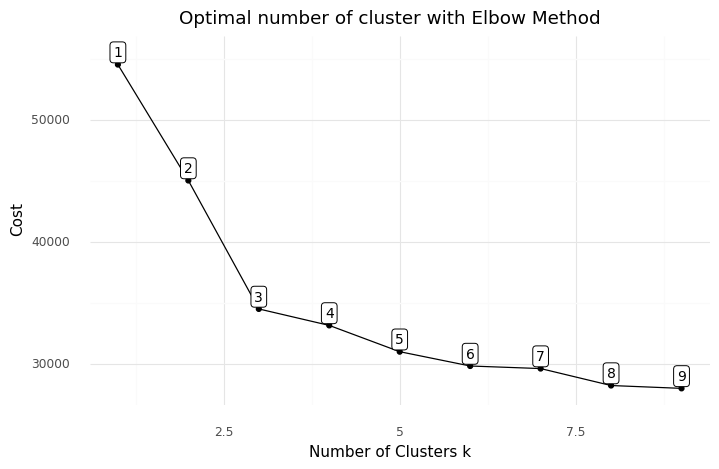

<ggplot: (8729019764505)>

In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost': cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

Com isso, sabemos que o número ideal de clusters é 3. Vamos treinar novamente um modelo com 3 clusters:

In [ ]:
kmodes = KModes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kmodes.fit_predict(df)
labels = kmodes.labels_

In [ ]:
df_kmodes = df
df_kmodes['labels'] = labels
df_kmodes.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,labels
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,1
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,1
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,1
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,1
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,1


In [ ]:
df_kmodes1 = df_kmodes[df_kmodes['labels']==1]
df_kmodes1.describe()

,labels
count,3356.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [ ]:
kmodes.cluster_centroids_

array([['Male', 'No', 'No', 'No', 'Yes', 'No', 'No',
        'No internet service', 'No internet service',
        'No internet service', 'No internet service',
        'No internet service', 'No internet service', 'Two year', 'No',
        'Mailed check', 'No'],
       ['Male', 'No', 'No', 'No', 'Yes', 'No', 'Fiber optic', 'No', 'No',
        'No', 'No', 'No', 'No', 'Month-to-month', 'Yes',
        'Electronic check', 'No'],
       ['Female', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Fiber optic', 'No',
        'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes',
        'Electronic check', 'No']], dtype='<U19')

# 3 K-Prototypes

## 3.1 Funcionamento

Este [vídeo](https://www.youtube.com/watch?v=RMHxVbKGvUM&t=212s&ab_channel=StatistikInferensial) resume bem o funcionamento do K-Prototype, este é o [artigo](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.15.4028&rep=rep1&type=pdf) onde o K-Prototype foi proposto.

A motivação para o uso do K-Prototypes é simples: já temos o K-Means para clusterizar dados numéricos com alguma métrica de distância; já temos o K-Modes para clusterizar dados categóricos com a função de dissimilaridade que vimos na seção anterior; mas como fazemos para trabalhar com dados mistos, que contém variáveis numéricas e categóricas?

É aí que entra o K-Prototypes: um algoritmo de clusterização para conjuntos de dados que possuem tanto variáveis numéricas quanto categóricas.

O que o K-Prototypes faz é o seguinte: para as variáveis numéricas, ele calcula a distância euclidiana, como o K-Means, e para as variáveis categóricas, ele calcula a dissimilaridade como K-Modes, estabelecendo a seguinte fórmula de dissimilaridade entre duas observações $X$ e $Y$ (no exemplo que será dado, tomaremos $\delta = 5$):

$$d_2(X,Y) = \sum_{j=1}^p(x_j - y_j)^2 + \gamma\sum_{j=p+1}^m\delta(x_j, y_j)$$

Onde, de $1$ até $p$, temos as variáveis numéricas e, de $p+1$ até $m$, as categóricas.

Algoritmo:

```

1. Tome K observações aleatórias para serem os modos/líderes dos clusters;
2. Calcule as dissimilaridades entre as observações e os modos/líderes e atribua cada observação ao seu cluster mais próximo;
3. Defina novos modos para os clusters (nas colunas numéricas isso é feito tomando a média dos valores do cluster; nas categóricas, isso é feito tomando o valor que mais se repete);
4. Repita os steps 2-3 até que não haja necessidade de reatribuições de modos.

```

## Step 1: Tome K observações aleatórias para serem os modos/líderes dos clusters

Escolhendo $K=2$, tomemos C2 e C4 como os líderes iniciais dos clusters laranja e amarelo, respectivamente:

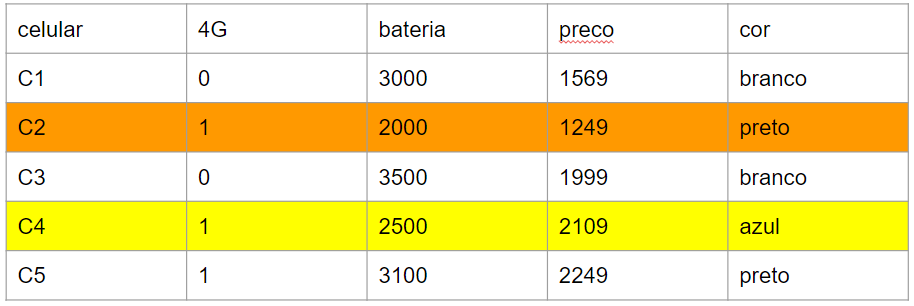

## Step 2: Calcule as dissimilaridades entre as observações e os modos/líderes e atribua cada observação ao seu cluster mais próximo

Vamos iniciar calculando a dissimilaridade de C2 (líder do Cluster Laranja) com a observação C1:

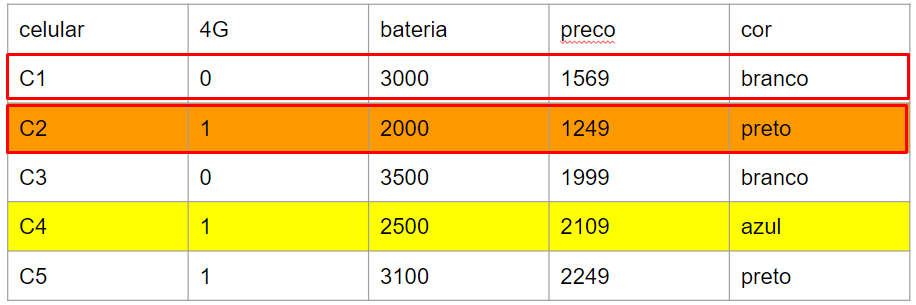

O resultado será: 

$$d_2(C1,C2) = 5\cdot 1 + (3000-2000)^2 + (1569-1249)^2 + 5\cdot 1 = 1.102.410$$

Em seguida, calculando a dissimilaridade de C2 (líder do Cluster Laranja) com a observação C2, teremos:

$$d_2(C2,C2) = 0$$

Pois $C_2 = C_2$.

Seguindo com esse esquema, calculamos as dissimilaridades entre os líderes dos dois clusters e construímos a tabela:

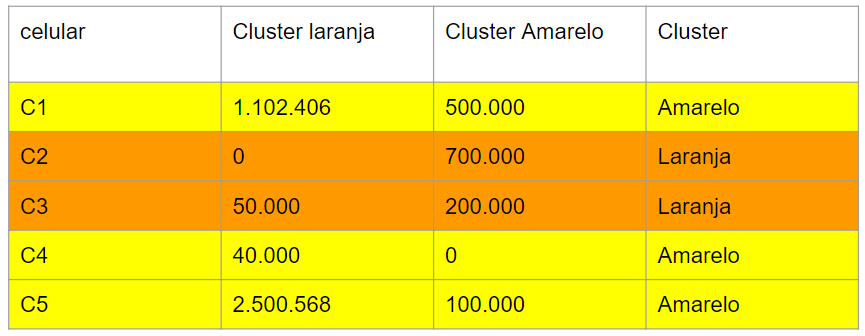

Note que, usando as dissimilaridades, já atribuímos cada ponto a um cluster.

## Step 3: Redefinir os modos

Para redefinir os modos, separemos os clusters amarelo e laranja. Em cada cluster, construiremos o novo modo entrada por entrada. Para fazer isso, nas colunas numéricas tomamos a média e, nas colunas categóricas tomamos o valor com mais incidências. Por exemplo, no caso do cluster amarelo:

* Na coluna `4G`, como é categórica, tomamos o valor 1 porque ele é o que mais apareceu no cluster;

* Na coluna `bateria`, tomamos a média porque a coluna é numérica;

* Em `preco` tomamos a média;

* Em `cor`, como é uma coluna categórica, tomamos o valor que mais apareceu.

Obs.: as entradas azuis dos modos são resultados atribuídos aleatoriamente por conta de algum empate. Note que, na coluna `cor` do cluster amarelo, branco, azul e preto tiveram 1 incidência, então o desempate ocorreu aleatoriamente e atribuiu preto para o novo modo.

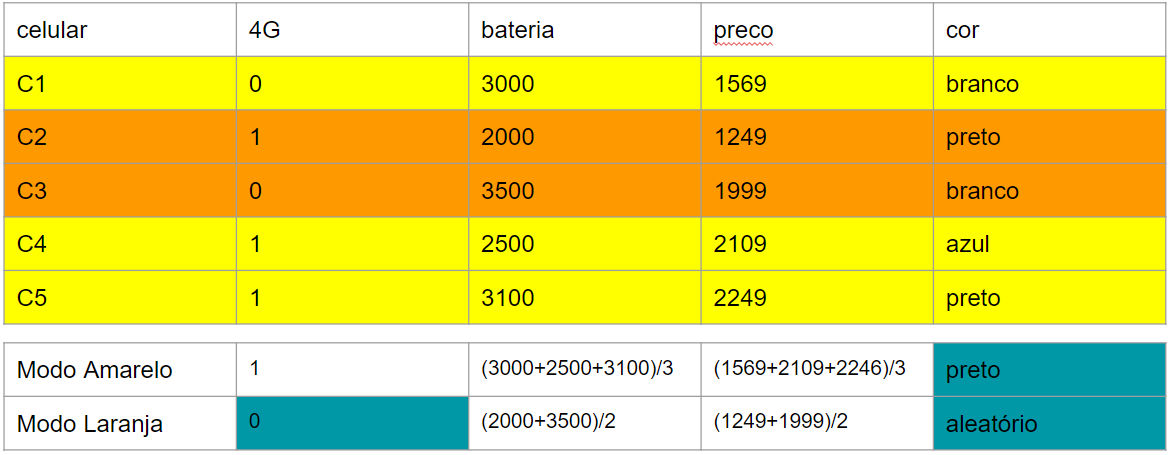

E, fazendo essas contas, temos os novos modos para cada cluster, conforme a imagem abaixo:

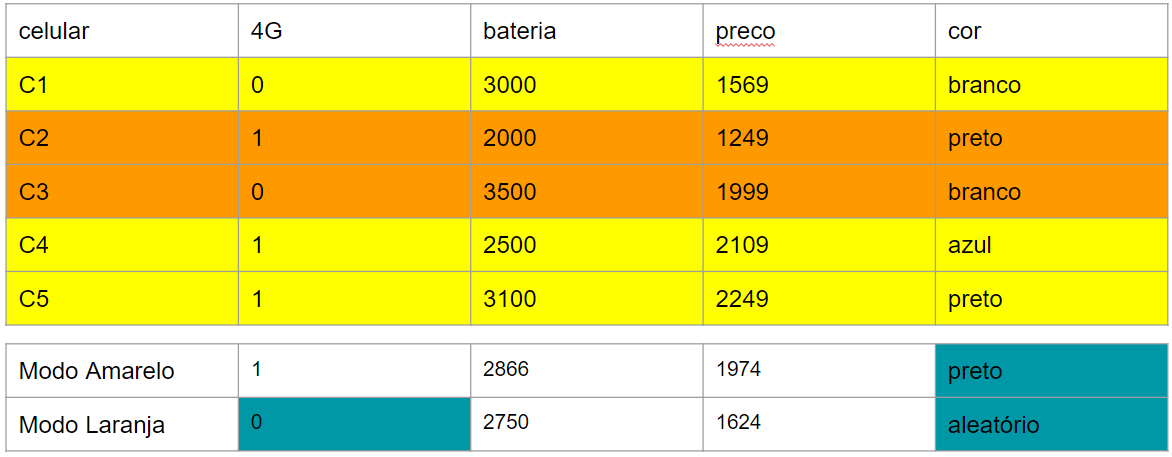

## Step 4: Repita os steps 2-3

Assim como o K-Modes, o modelo seguirá repetindo os passos 2 e 3 até que não haja mais necessidade de reatribuição (quando fazemos uma atualização de modos e os modos não são mais alterados) ou quando atingimos um número máximo de iterações `max_iter` predefinido.

## 3.2 Implementação

O dataset do Google Analytics utilizado nesta sessão e alguns procedimentos foram retirados do artigo [K-Prototypes - Clustering de clientes com tipos de dados mistos](https://antonsruberts.github.io/kproto-audience/).

### 3.2.1 Treinando o K-Prototypes

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
!pip install kmodes
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import PowerTransformer # transformação para deixar os dados com uma distribuição gaussiana / normal
import matplotlib.pyplot as plt

O dataset utilizado é um conjunto de dados extraídos do Google Analytics:

In [ ]:
df_ga = pd.read_csv('/content/drive/MyDrive/Portfólio Ciência de Dados/Não Supervisionado/Clusterização/data_ga.csv.txt')
df_ga.head()

,fullVisitorId,channelGrouping,weekend_prop,hour,sessionId,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,totals.hits,totals.pageviews,bounce_prop,trafficSource.medium
0,213131142648941,Direct,0.000000,22.0,1,Chrome,desktop,0.0,Macintosh,14.0,13.0,0.0,(none)
1,435324061339869,Referral,0.666667,21.0,3,Chrome,desktop,0.0,Macintosh,14.0,11.0,0.0,referral
2,562678147042735,Organic Search,0.000000,14.0,2,Chrome,desktop,0.0,Macintosh,12.5,10.5,0.0,organic
3,585708896049892,Referral,0.000000,20.0,1,Chrome,desktop,0.0,Linux,22.0,20.0,0.0,referral
4,670722016498267,Referral,0.000000,17.0,2,Chrome,desktop,0.0,Linux,9.5,9.5,0.0,referral


Vejamos o tipo de dados de cada coluna:

In [ ]:
df_ga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fullVisitorId           9996 non-null   uint64 
 1   channelGrouping         9996 non-null   object 
 2   weekend_prop            9996 non-null   float64
 3   hour                    9996 non-null   float64
 4   sessionId               9996 non-null   int64  
 5   device.browser          9996 non-null   object 
 6   device.deviceCategory   9996 non-null   object 
 7   device.isMobile         9996 non-null   float64
 8   device.operatingSystem  9996 non-null   object 
 9   totals.hits             9996 non-null   float64
 10  totals.pageviews        9996 non-null   float64
 11  bounce_prop             9996 non-null   float64
 12  trafficSource.medium    9996 non-null   object 
dtypes: float64(6), int64(1), object(5), uint64(1)
memory usage: 1015.3+ KB


In [ ]:
kprot_data = df_ga.copy()
# pré-processamento nos dados numéricos
for c in df_ga.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    kprot_data[c] =  pt.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))

# índices das colunas categóricas, para que o kprototypes saiba onde usar a similaridade
categorical_columns = [1, 5, 6, 7, 8, 12]

# treinamento e predição com o modelo
kproto = KPrototypes(n_clusters= 5, init='Cao', n_jobs = -1)
clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns) # note que passamos quais colunas são categóricas

# print dos rótulos
pd.Series(clusters).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


3    2763
4    2343
0    2047
2    1473
1    1370
dtype: int64

Vamos encontrar o valor ideal para K utilizando o método do cotovelo. Primeiro, vamos calcular os custos conforme variamos o K:

In [ ]:
# Choosing optimal K
cost = []
for k in range(1, 10):
    kproto = KPrototypes(n_clusters= k, init='Cao', n_jobs = -1)
    clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)
    cost.append(kproto.cost_)
    print('Cluster initiation: {}'.format(k))

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


Agora, vamos plotar o gráfico do cotovelo:

In [ ]:
from plotnine import *
import plotnine
# Data visualization with matplotlib
import matplotlib.pyplot as plt
# Use the theme of ggplot
plt.style.use('ggplot')

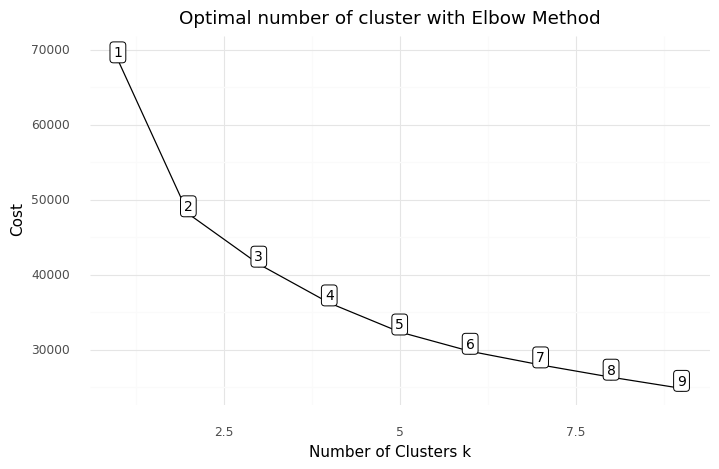

<ggplot: (8744543953889)>

In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost': cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

Nota-se que o número ideal de clusters está entre 2 e 4.

### 3.2.2 Visualizando os resultados com UMAP

Estes artigos: [artigo 1](https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668) e [artigo 2](https://towardsdatascience.com/umap-dimensionality-reduction-an-incredibly-robust-machine-learning-algorithm-b5acb01de568) (muito bom) explicam o que é o UMAP (Uniform Manifold Approximation and Projection).

Esta é a [documentação](https://umap-learn.readthedocs.io/en/latest/basic_usage.html) do UMA

De forma grosseira, UMAP é uma técnica de redução de dimensionalidade. Com essa redução de dimensionalidade, conseguimos visualizar nossos dados de n dimensões em um plano.

In [ ]:
!pip install umap-learn
import umap

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [ ]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [ ]:
df_ga_umap = df_ga.dropna()
df_ga_umap['clusters'] = clusters

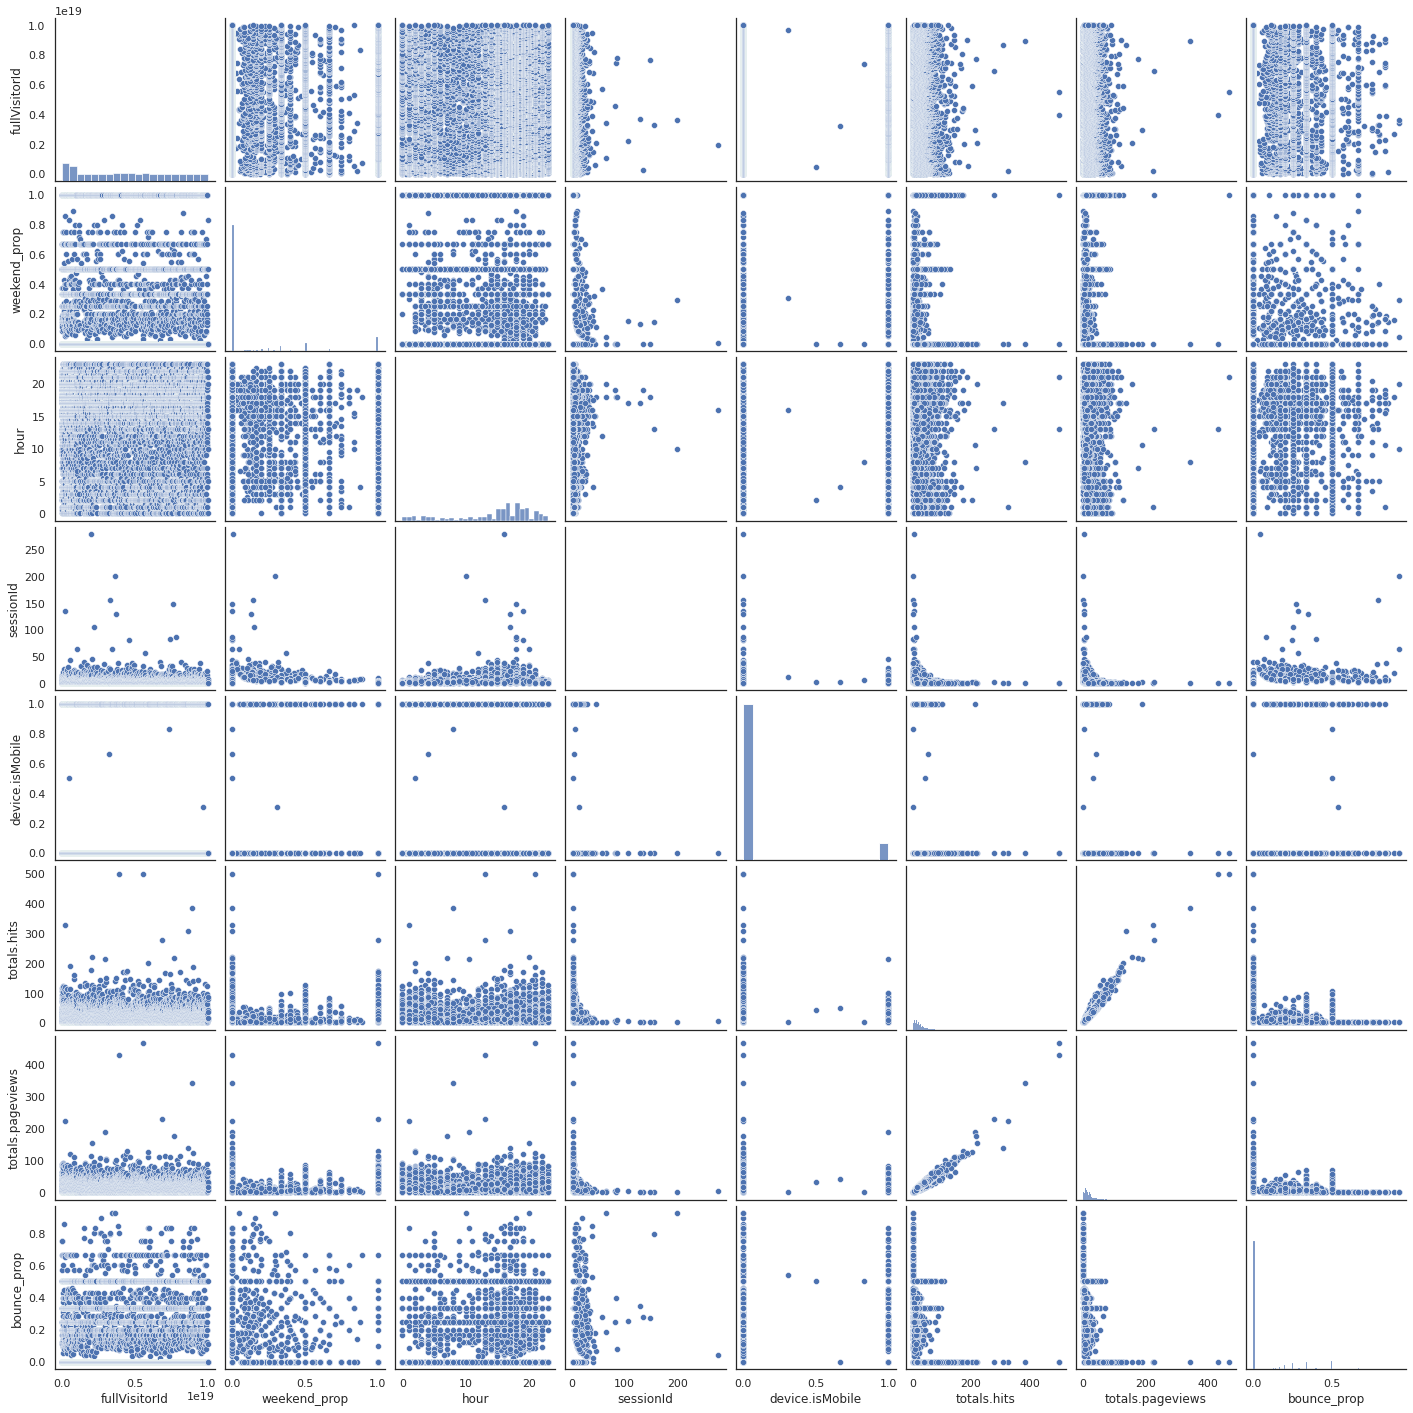

In [ ]:
sns.pairplot(df_ga_umap)

In [ ]:
reducer = umap.UMAP()

In [ ]:
df_ga_umap.head()

,fullVisitorId,channelGrouping,weekend_prop,hour,sessionId,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,totals.hits,totals.pageviews,bounce_prop,trafficSource.medium,clusters
0,213131142648941,Direct,0.000000,22.0,1,Chrome,desktop,0.0,Macintosh,14.0,13.0,0.0,(none),3
1,435324061339869,Referral,0.666667,21.0,3,Chrome,desktop,0.0,Macintosh,14.0,11.0,0.0,referral,2
2,562678147042735,Organic Search,0.000000,14.0,2,Chrome,desktop,0.0,Macintosh,12.5,10.5,0.0,organic,0
3,585708896049892,Referral,0.000000,20.0,1,Chrome,desktop,0.0,Linux,22.0,20.0,0.0,referral,3
4,670722016498267,Referral,0.000000,17.0,2,Chrome,desktop,0.0,Linux,9.5,9.5,0.0,referral,0


In [ ]:
df_ga_umap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9995
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fullVisitorId           9996 non-null   uint64 
 1   channelGrouping         9996 non-null   object 
 2   weekend_prop            9996 non-null   float64
 3   hour                    9996 non-null   float64
 4   sessionId               9996 non-null   int64  
 5   device.browser          9996 non-null   object 
 6   device.deviceCategory   9996 non-null   object 
 7   device.isMobile         9996 non-null   float64
 8   device.operatingSystem  9996 non-null   object 
 9   totals.hits             9996 non-null   float64
 10  totals.pageviews        9996 non-null   float64
 11  bounce_prop             9996 non-null   float64
 12  trafficSource.medium    9996 non-null   object 
 13  clusters                9996 non-null   uint16 
dtypes: float64(6), int64(1), object(5), uint

In [ ]:
numeric_cols = df_ga_umap[
    [
        "weekend_prop",
        "hour",
        "totals.hits",
        "totals.pageviews",
        "bounce_prop"
    ]
].values
scaled_data = StandardScaler().fit_transform(numeric_cols)

In [ ]:
embedding = reducer.fit_transform(scaled_data)
embedding.shape

(9996, 2)

#### Treinos para umaps

In [ ]:
# treino com 2 clusters
kproto = KPrototypes(n_clusters= 2, init='Cao', n_jobs = -1)
clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)
df_ga_umap['labels2'] = clusters
print('Cluster initiation: {}'.format(k))

Cluster initiation: 2


In [ ]:
# treino com 3 clusters
kproto = KPrototypes(n_clusters= 3, init='Cao', n_jobs = -1)
clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)
df_ga_umap['labels3'] = clusters

In [ ]:
# treino com 4 clusters
kproto = KPrototypes(n_clusters= 4, init='Cao', n_jobs = -1)
clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)
df_ga_umap['labels4'] = clusters

#### UMAPS

Text(0.5, 1.0, 'UMAP projection of the Google Analytics dataset')

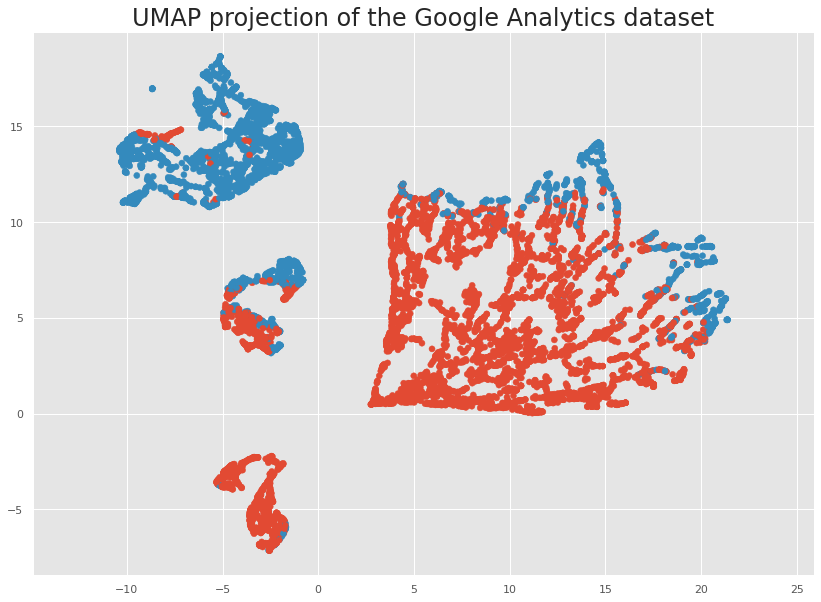

In [ ]:
# umap com 2 clusters
plt.scatter(
embedding[:, 0],
embedding[:, 1],
c=[sns.color_palette()[x] for x in df_ga_umap.labels2.map({0:0, 1:1, 2:2, 3:3, 4:4})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Google Analytics dataset', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of the Google Analytics dataset')

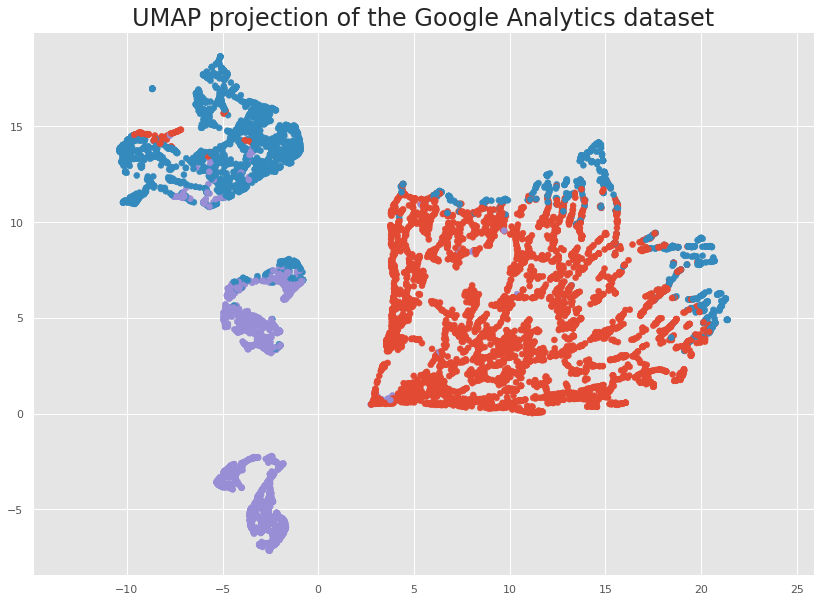

In [ ]:
# umap com 3 clusters
plt.scatter(
embedding[:, 0],
embedding[:, 1],
c=[sns.color_palette()[x] for x in df_ga_umap.labels3.map({0:0, 1:1, 2:2, 3:3, 4:4})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Google Analytics dataset', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of the Google Analytics dataset')

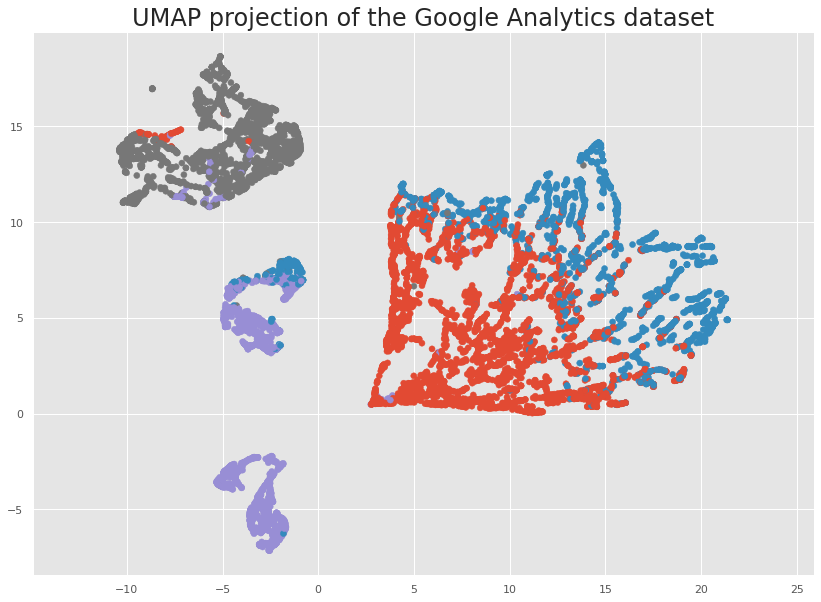

In [ ]:
# umap com 4 clusters
plt.scatter(
embedding[:, 0],
embedding[:, 1],
c=[sns.color_palette()[x] for x in df_ga_umap.labels4.map({0:0, 1:1, 2:2, 3:3, 4:4})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Google Analytics dataset', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of the Google Analytics dataset')

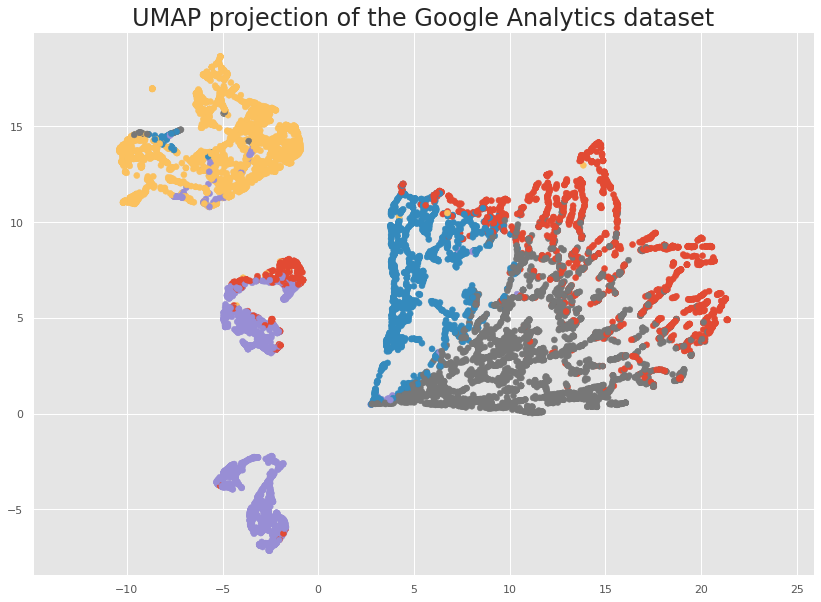

In [ ]:
# umap com 5 clusters
plt.scatter(
embedding[:, 0],
embedding[:, 1],
c=[sns.color_palette()[x] for x in df_ga_umap.clusters.map({0:0, 1:1, 2:2, 3:3, 4:4})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Google Analytics dataset', fontsize=24)

# 4 Próximos passos

* Gerar um dataset em $R_n$ com make blobs e tentar visualizar com umaps e pairplot;

* Organizar o processo de treino e plot dos UMAPs com um laço for

* Entender como o UMAP funciona